## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layers = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layers)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layers], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [1-1e-1, 1-1e-2, 1-1e-3, 1-1e-4, 1-1e-5]
NESTEROV = [True, False]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    for nesterov in NESTEROV:
        keras.backend.clear_session()
        model = build_mlp(x_train.shape[-1])
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        train_loss = model.history.history['loss']
        val_loss = model.history.history['val_loss']
        train_accuracy = model.history.history['accuracy']
        val_accuracy = model.history.history['val_accuracy']

        name_tag = 'exp-mt-%s-nt-%s' %(str(momentum), str(nesterov))

        results[name_tag] = {'loss': train_loss,
                            'val_loss': val_loss,
                            'acc': train_accuracy,
                            'val_acc': val_accuracy}


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
194/196 [============================>.] - ETA: 0s - loss: 2.0775 - accuracy: 0.2576 ETA: 0s - loss: 2.1005 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019EABA070D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export

196/196 [==============================] - 6s 29ms/step - loss: 1.1761 - accuracy: 0.5875 - val_loss: 1.3763 - val_accuracy: 0.5096
Epoch 45/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1666 - accuracy: 0.5895 - val_loss: 1.3534 - val_accuracy: 0.5221
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 1.1591 - accuracy: 0.5935 - val_loss: 1.4129 - val_accuracy: 0.5057
Epoch 47/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1493 - accuracy: 0.5947 - val_loss: 1.3585 - val_accuracy: 0.5217
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1445 - accuracy: 0.5978 - val_loss: 1.3613 - val_accuracy: 0.5205
Epoch 49/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1326 - accuracy: 0.6032 - val_loss: 1.3566 - val_accuracy: 0.5144
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 1.1255 - accuracy: 0.6046 - val_loss: 1.3397 - val_accuracy: 0.5280
Epoc

Epoch 38/50
196/196 [==============================] - 4s 18ms/step - loss: 1.2491 - accuracy: 0.5610 - val_loss: 1.3690 - val_accuracy: 0.5144
Epoch 39/50
196/196 [==============================] - 4s 19ms/step - loss: 1.2453 - accuracy: 0.5604 - val_loss: 1.3768 - val_accuracy: 0.5049
Epoch 40/50
196/196 [==============================] - 4s 18ms/step - loss: 1.2322 - accuracy: 0.5673 - val_loss: 1.3551 - val_accuracy: 0.5154
Epoch 41/50
196/196 [==============================] - 4s 23ms/step - loss: 1.2212 - accuracy: 0.5710 - val_loss: 1.3951 - val_accuracy: 0.5044
Epoch 42/50
196/196 [==============================] - 4s 21ms/step - loss: 1.2216 - accuracy: 0.5703 - val_loss: 1.3530 - val_accuracy: 0.5142
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 1.2097 - accuracy: 0.5774 - val_loss: 1.3577 - val_accuracy: 0.5153
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1973 - accuracy: 0.5816 - val_loss: 1.3678 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 0.8183 - accuracy: 0.7079 - val_loss: 1.4288 - val_accuracy: 0.5426
Epoch 32/50
196/196 [==============================] - 5s 27ms/step - loss: 0.7861 - accuracy: 0.7194 - val_loss: 1.4669 - val_accuracy: 0.5395
Epoch 33/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7761 - accuracy: 0.7213 - val_loss: 1.4757 - val_accuracy: 0.5376
Epoch 34/50
196/196 [==============================] - 5s 26ms/step - loss: 0.7546 - accuracy: 0.7299 - val_loss: 1.4902 - val_accuracy: 0.5375
Epoch 35/50
196/196 [==============================] - 6s 29ms/step - loss: 0.7406 - accuracy: 0.7338 - val_loss: 1.5052 - val_accuracy: 0.5315
Epoch 36/50
196/196 [==============================] - 6s 29ms/step - loss: 0.7334 - accuracy: 0.7358 - val_loss: 1.5466 - val_accuracy: 0.5324
Epoch 37/50
196/196 [==============================] - 5s 28ms/step - loss: 0.7064 - accuracy: 0.7467 - val_loss: 1.5306 - val_accuracy: 0.5394
Epoc

196/196 [==============================] - 6s 30ms/step - loss: 1.1363 - accuracy: 0.5928 - val_loss: 1.3869 - val_accuracy: 0.5135
Epoch 25/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1257 - accuracy: 0.5989 - val_loss: 1.3752 - val_accuracy: 0.5201
Epoch 26/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0984 - accuracy: 0.6071 - val_loss: 1.3610 - val_accuracy: 0.5255
Epoch 27/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0875 - accuracy: 0.6117 - val_loss: 1.3660 - val_accuracy: 0.5230
Epoch 28/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0776 - accuracy: 0.6155 - val_loss: 1.3526 - val_accuracy: 0.5341
Epoch 29/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0488 - accuracy: 0.6252 - val_loss: 1.3798 - val_accuracy: 0.5243
Epoch 30/50
196/196 [==============================] - 6s 28ms/step - loss: 1.0200 - accuracy: 0.6369 - val_loss: 1.3677 - val_accuracy: 0.5285
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 1.2713 - accuracy: 0.5501 - val_loss: 1.4325 - val_accuracy: 0.4997
Epoch 18/50
196/196 [==============================] - 5s 25ms/step - loss: 1.2516 - accuracy: 0.5567 - val_loss: 1.4513 - val_accuracy: 0.5014
Epoch 19/50
196/196 [==============================] - 5s 25ms/step - loss: 1.2328 - accuracy: 0.5656 - val_loss: 1.4445 - val_accuracy: 0.5042
Epoch 20/50
196/196 [==============================] - 5s 25ms/step - loss: 1.2251 - accuracy: 0.5663 - val_loss: 1.4342 - val_accuracy: 0.5015
Epoch 21/50
196/196 [==============================] - 4s 23ms/step - loss: 1.2180 - accuracy: 0.5679 - val_loss: 1.4613 - val_accuracy: 0.5036
Epoch 22/50
196/196 [==============================] - 5s 23ms/step - loss: 1.2017 - accuracy: 0.5765 - val_loss: 1.4734 - val_accuracy: 0.4997
Epoch 23/50
196/196 [==============================] - 4s 23ms/step - loss: 1.1886 - accuracy: 0.5817 - val_loss: 1.4359 - val_accuracy: 0.5043
Epoc

196/196 [==============================] - 4s 23ms/step - loss: 1.5117 - accuracy: 0.4604 - val_loss: 1.5488 - val_accuracy: 0.4497
Epoch 11/50
196/196 [==============================] - 6s 30ms/step - loss: 1.4877 - accuracy: 0.4659 - val_loss: 1.5443 - val_accuracy: 0.4404
Epoch 12/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4731 - accuracy: 0.4733 - val_loss: 1.5562 - val_accuracy: 0.4564
Epoch 13/50
196/196 [==============================] - 5s 23ms/step - loss: 1.4602 - accuracy: 0.4806 - val_loss: 1.5228 - val_accuracy: 0.4642
Epoch 14/50
196/196 [==============================] - 5s 25ms/step - loss: 1.4460 - accuracy: 0.4806 - val_loss: 1.5263 - val_accuracy: 0.4616
Epoch 15/50
196/196 [==============================] - 5s 25ms/step - loss: 1.4304 - accuracy: 0.4899 - val_loss: 1.5234 - val_accuracy: 0.4679
Epoch 16/50
196/196 [==============================] - 5s 25ms/step - loss: 1.4203 - accuracy: 0.4926 - val_loss: 1.5220 - val_accuracy: 0.4693
Epoc

196/196 [==============================] - 5s 25ms/step - loss: 1.6828 - accuracy: 0.4056 - val_loss: 1.6856 - val_accuracy: 0.3998
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 1.6238 - accuracy: 0.4262 - val_loss: 1.6251 - val_accuracy: 0.4243
Epoch 5/50
196/196 [==============================] - 5s 25ms/step - loss: 1.5911 - accuracy: 0.4363 - val_loss: 1.5975 - val_accuracy: 0.4420
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 1.5742 - accuracy: 0.4470 - val_loss: 1.6156 - val_accuracy: 0.4279
Epoch 7/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5836 - accuracy: 0.4418 - val_loss: 1.5989 - val_accuracy: 0.4335
Epoch 8/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5759 - accuracy: 0.4425 - val_loss: 1.5805 - val_accuracy: 0.4475
Epoch 9/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5645 - accuracy: 0.4524 - val_loss: 1.6076 - val_accuracy: 0.4354
Epoch 10/5

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 5s 25ms/step - loss: 2.0397 - accuracy: 0.2598 - val_loss: 1.9532 - val_accuracy: 0.3098
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 1.8726 - accuracy: 0.3217 - val_loss: 1.7953 - val_accuracy: 0.3543
Epoch 3/50
196/196 [==============================] - 4s 23ms/step - loss: 1.7662 - accuracy: 0.3643 - val_loss: 1.7247 - val_accuracy: 0.3832
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7165 - accuracy: 0.3869 - val_loss: 1.7030 - val_accuracy: 0.3974
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 1.6759 - accuracy: 0.4048 - val_loss: 1.6579 - val_ac

196/196 [==============================] - ETA: 0s - loss: 1.9956 - accuracy: 0.2850WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019EB6288DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 6s 29ms/step - loss: 1.9956 - accuracy: 0.2850 - val_loss: 1.8651 - val_accuracy: 0.3432
Epoch 2/5

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 2.0605 - accuracy: 0.2497 ETA: 0s - loss: 2.084WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019EB92A0168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VE

Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 2.4057 - accuracy: 0.1005 - val_loss: 2.3945 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3650 - accuracy: 0.1004 - val_loss: 2.3632 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3857 - accuracy: 0.1003 - val_loss: 2.3328 - val_accuracy: 0.1000


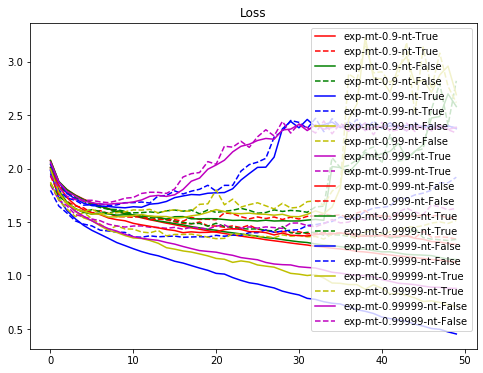

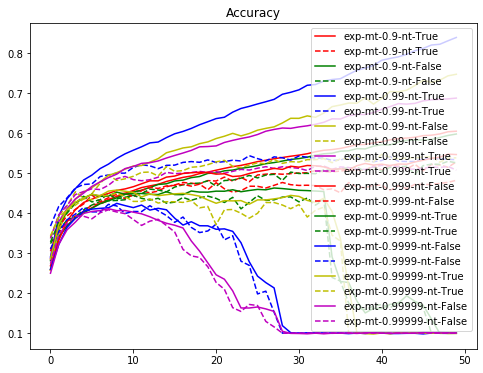

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "r", "g", "b", "y", "m"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-',color=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', color=color_bar[i], label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i , cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['acc'])), results[cond]['acc'], '-', color=color_bar[i], label=cond)
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', color=color_bar[i], label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()
